In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation
from tensorflow.keras import Model
from keras.datasets import mnist
from __future__ import absolute_import, division, print_function, unicode_literals

LOG_DIR = "../saved_models/"
MODEL_NAME = "10_4_19_mnist_am_weights"

In [97]:
IMG_SHAPE = (224, 224, 3)

In [98]:
def plot_image(tensor): 
    pixels = am_input.numpy().reshape((224, 224, 3))
    plt.figure(figsize=(10, 10))
    plt.imshow(pixels)
    plt.show()
    plt.close()
    
# util function to convert a tensor into a valid image
def deprocess_image(x, rgb=True):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    if rgb: 
        x *= 255
        x = np.clip(x, 0, 255).astype('uint8')
    return x


In [129]:
img_path = '../data/cat.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224, 3))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
LABEL = 281

In [130]:
base_model = tf.keras.applications.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 46s 0us/step


In [131]:
base_model.layers[-1].activation = tf.nn.softmax
assert(all(base_model(x)[0].numpy() < 1))
assert(np.argmax(base_model(x)) == LABEL)

In [132]:
base_model.layers[-1].activation = None
assert(any(base_model(x)[0].numpy() > 1))

In [157]:
# add random layer make sure the max is not 281
def am_loss(model, x, target, reg = 1, verbose=True):
    result = tf.reduce_mean(model(x)[0, target]) 
    return result
    # - reg * tf.reduce_mean(tf.square(x))

In [164]:
def plot_image(x): 
    shape = x.shape
    z = np.clip(x.numpy(), 0, 1).reshape((shape[1], shape[2], shape[3]))
    z *= 255
    plt.imshow(z)
    plt.show()
    plt.close()

In [165]:
am_input = tf.Variable(tf.random.normal((1, 224, 224, 3), mean=0.5, stddev=0.25), trainable=True)
am_input = tf.Variable(tf.clip_by_value(am_input, 0, 1), trainable=True)
print(am_input.shape)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.4598294


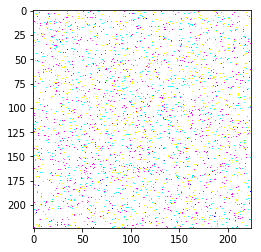

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.5097782


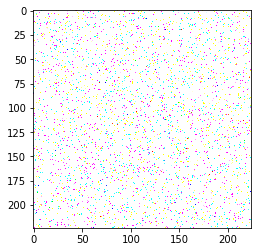

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.5550529


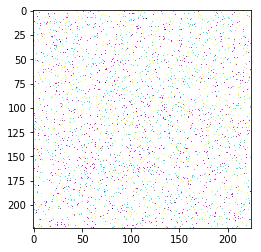

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.5960863


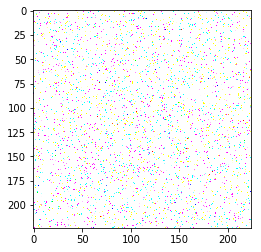

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.6339192


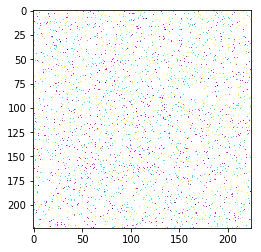

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.6662701


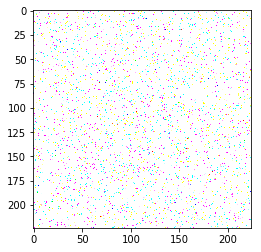

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.6958692


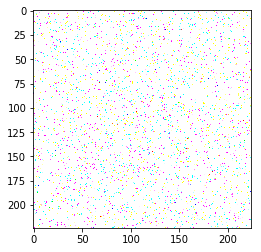

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.7244687


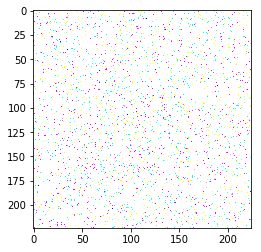

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.7502834


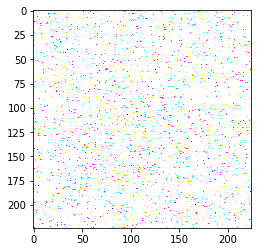

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.77397716


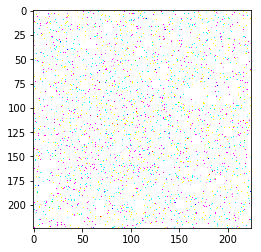

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.79707825


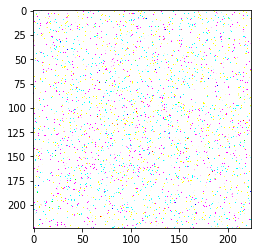

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.81921566


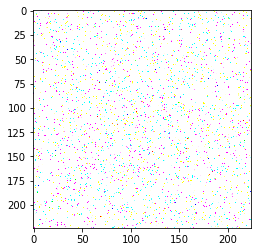

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.8398371


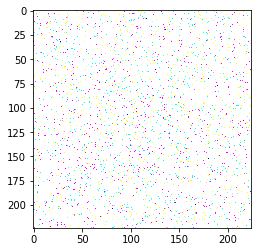

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.85834694


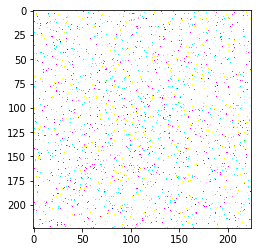

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.87571263


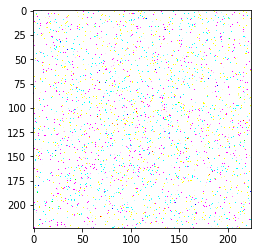

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.8918663


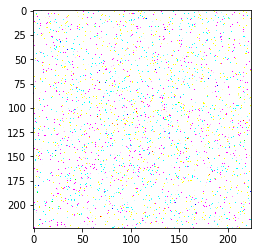

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.90691674


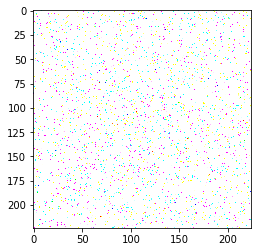

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.9211824


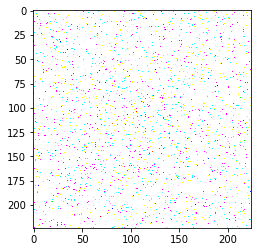

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.9354415


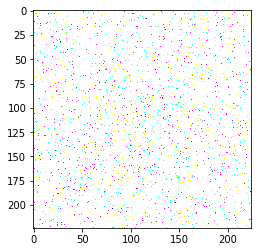

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.9497119


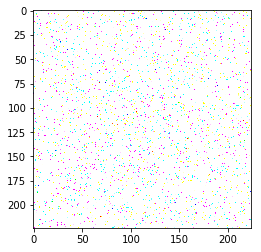

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.96402633


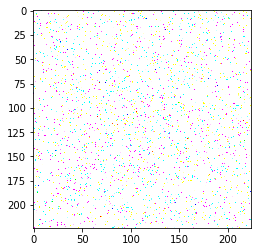

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.97839034


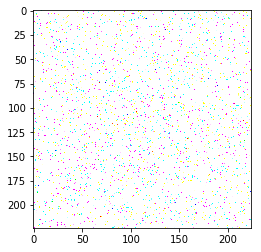

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  0.9932494


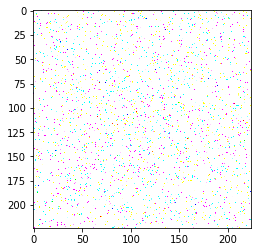

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.0084974


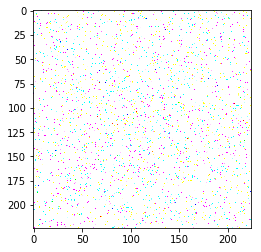

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.0235658


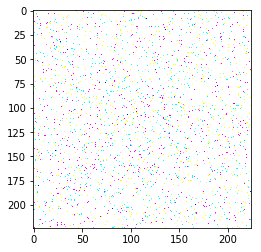

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.037711


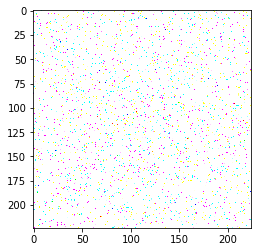

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.0511423


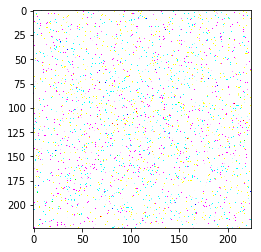

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.063943


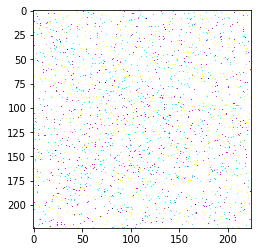

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.075887


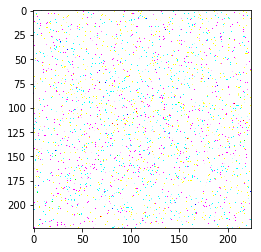

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.0876317


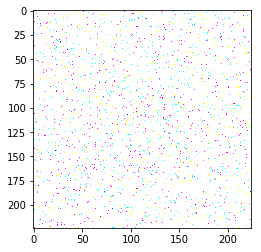

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.099116


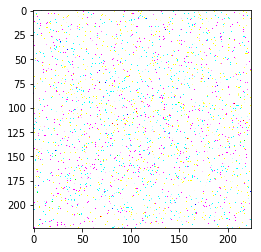

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1103594


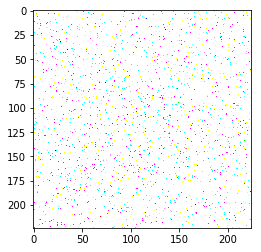

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1212804


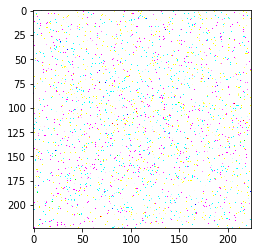

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1316749


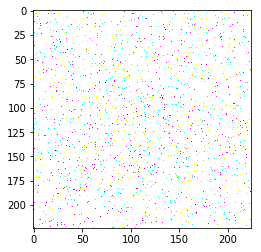

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1413918


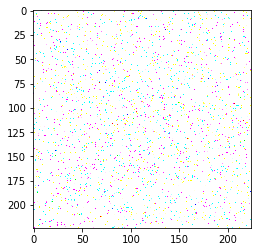

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1508619


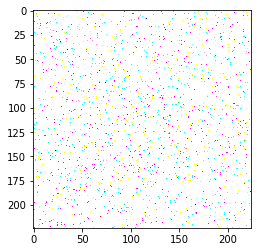

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1603062


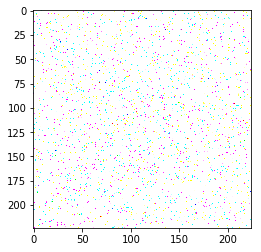

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.169611


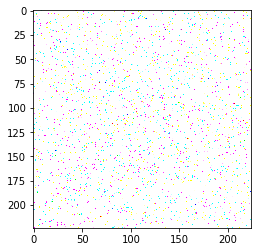

Activation Layer:  1.178595


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


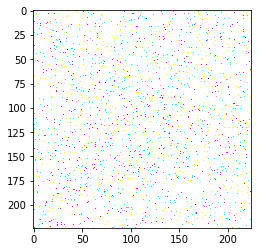

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1872005


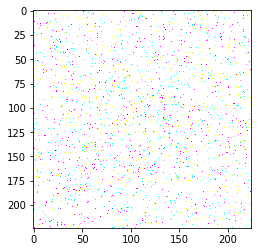

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.1953974


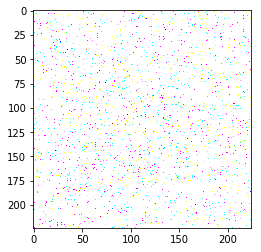

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2034675


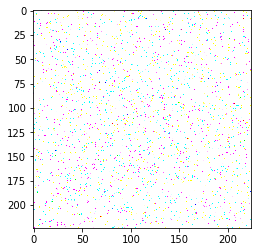

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2115496


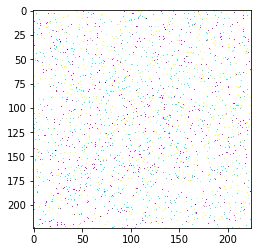

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2195207


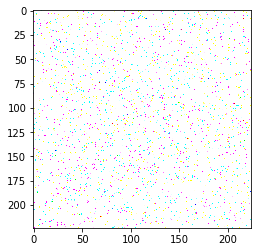

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2274476


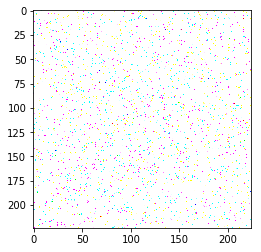

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2353296


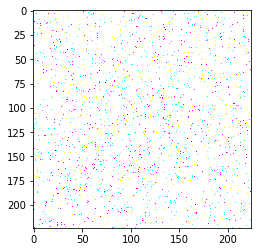

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2427521


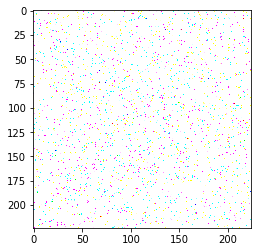

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2500888


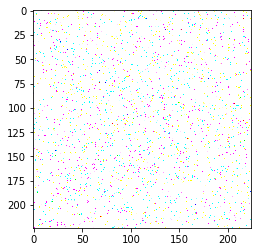

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2573314


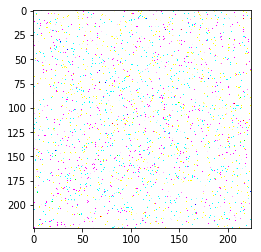

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2645731


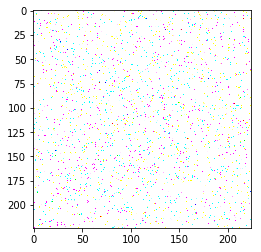

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2717879


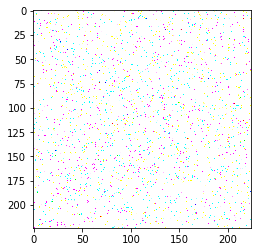

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2790716


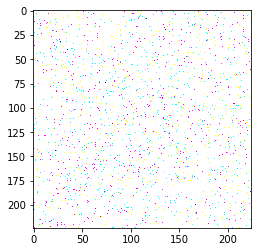

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2862902


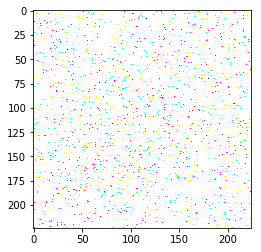

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.2936217


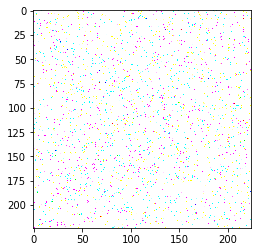

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3011992


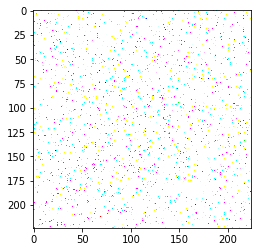

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3086528


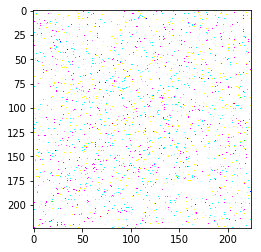

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3161782


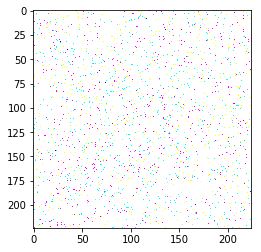

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3240585


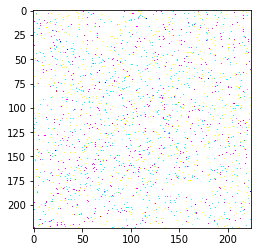

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3320185


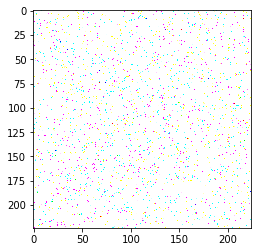

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.339768


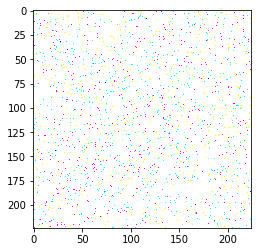

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3473423


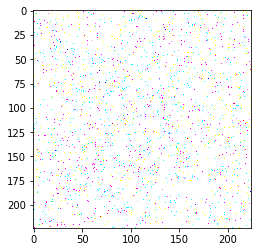

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3548915


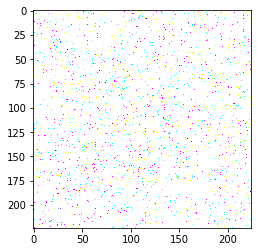

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3624105


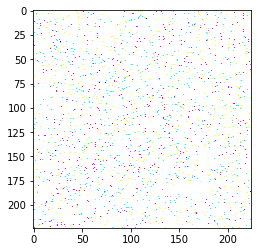

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3699173


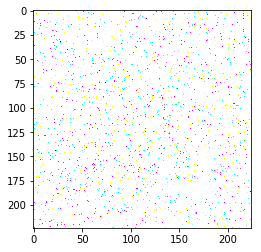

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3773637


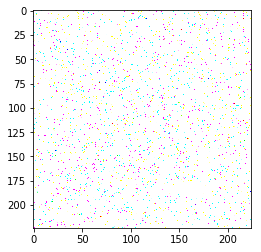

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3847698


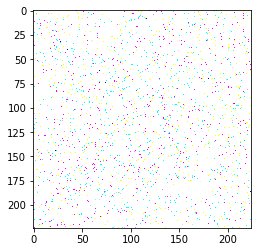

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3920875


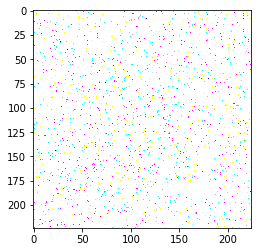

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.3993747


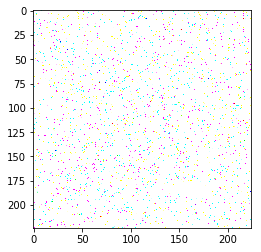

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4064132


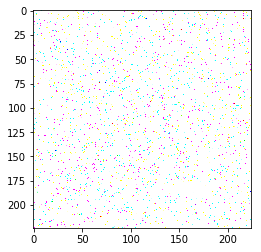

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.413481


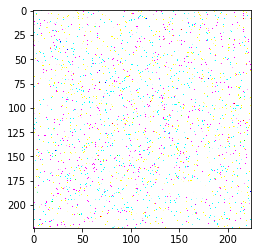

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4203665


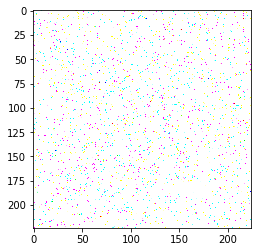

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4272314


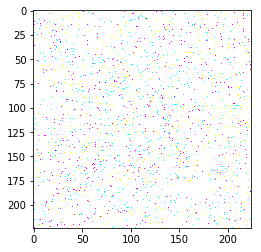

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4338712


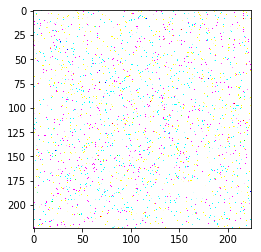

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4404055


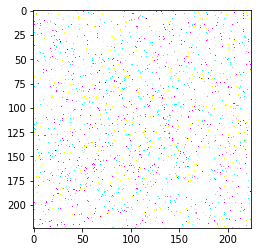

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4470851


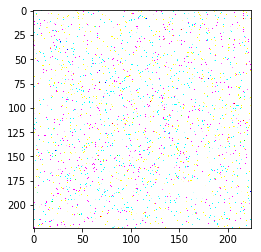

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4538954


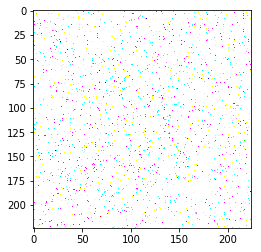

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4609052


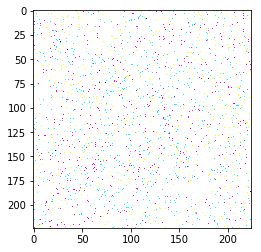

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4676567


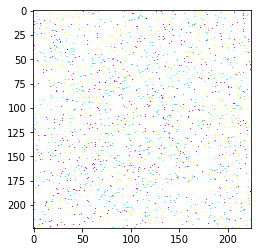

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4742057


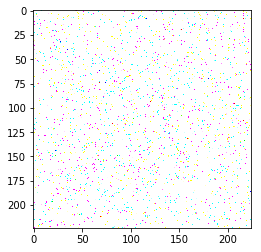

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.480537


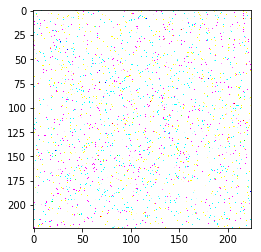

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4866158


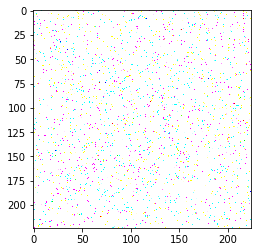

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4927351


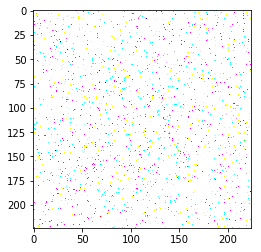

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.4989319


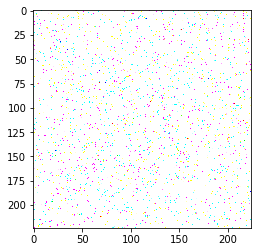

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5051492


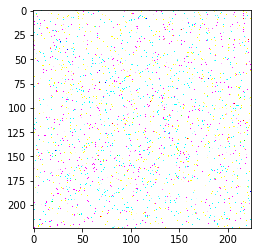

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5114375


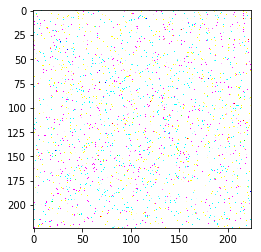

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5178152


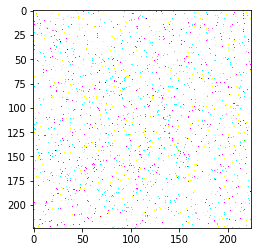

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5242164


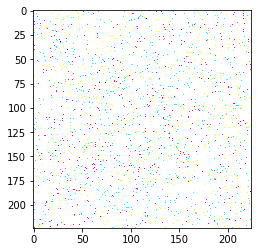

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5305656


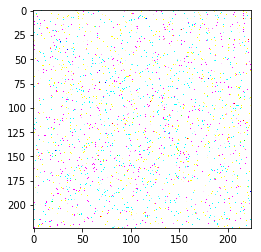

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5367558


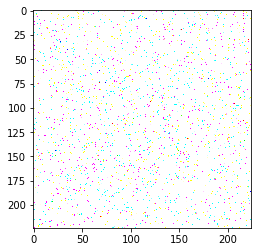

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.542842


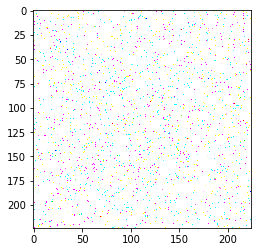

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.549055


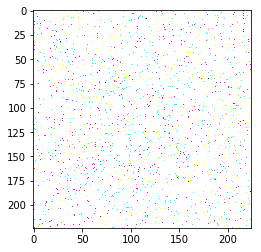

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5551245


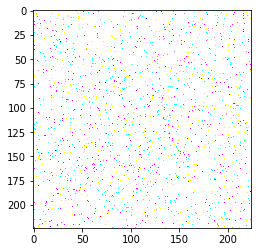

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5610255


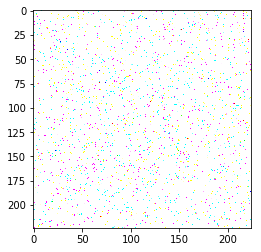

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5670007


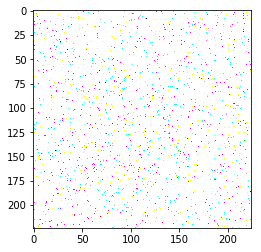

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5730271


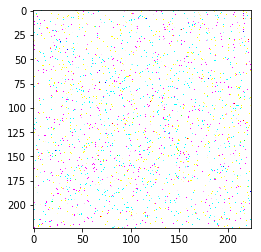

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5789251


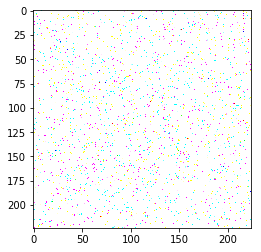

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5849353


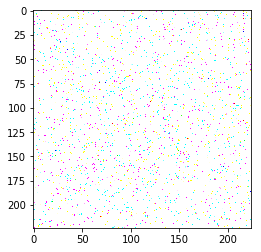

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5908382


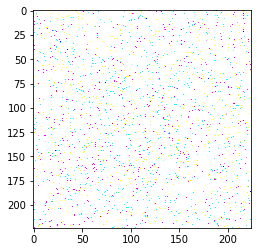

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.5966724


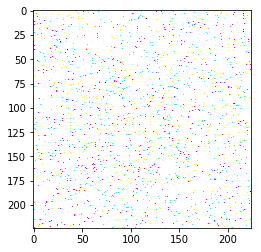

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Activation Layer:  1.6028312


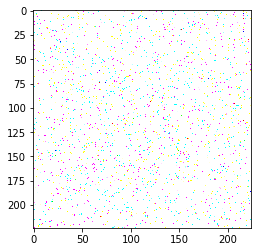

In [166]:
def feed_through_k_layer(model, inp, k): 
    assert(k < len(model.layers))
    x = inp
    for layer in model.layers[:k]: 
        x = layer(x)
    return x


target = LABEL
k = len(base_model.layers) - 1
iterations = 100
learning_rate = tf.constant(1.0)
for i in range(iterations):
    with tf.GradientTape() as tape:
        predictions = feed_through_k_layer(base_model, am_input, k)
        loss = am_loss(base_model, am_input, target, reg=1, verbose=True)
    am_gradient = tf.cast(tape.gradient(loss, am_input), tf.float64) 
    am_input.assign_add(learning_rate * tf.cast(am_gradient, tf.float32))
    am_input = tf.Variable(tf.clip_by_value(am_input, 0, 1), trainable=True)
    print("Activation Layer: ", loss.numpy())
    plot_image(am_input)

## Transfer Learning Example

(224, 224, 3)


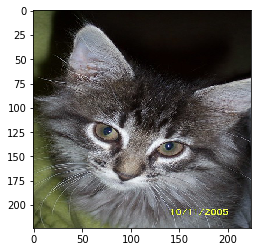

In [71]:
# example of saving an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

img = load_img(img_path, target_size = (224, 224))
# convert image to a numpy array
img_array = img_to_array(img)
print(img_array.shape)
img_array /= 255
plt.imshow(img_array)
plt.show()

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '../data/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.4143799), ('n02123394', 'Persian_cat', 0.24588664), ('n02123159', 'tiger_cat', 0.11540058)]


In [35]:
print(np.argmax(preds))
tabby_cat = 281

281
